In [40]:
import numpy as numpy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [41]:
df = pd.read_csv("student_performance.csv")

In [42]:
df.head()

,Student_ID,Study Time (hrs/week),Attendance (%),Parental Support,Internet Access,Extra Curricular,Failures,Core Python Internal,Core Python External,Core Python Total,...,Software Engineering Internal,Software Engineering External,Software Engineering Total,Data Warehousing and Data Mining Internal,Data Warehousing and Data Mining External,Data Warehousing and Data Mining Total,Overall Total,CGPA,Target,Previous_Year_CGPA
0,1,15,100,Yes,No,No,0,26,66,92,...,30,54,84,23,53,76,328,8.69,Pass,6.06
1,2,6,68,Yes,Yes,No,0,21,47,68,...,26,50,76,21,62,83,302,6.43,Pass,9.23
2,3,17,74,No,No,No,0,30,48,78,...,24,70,94,30,45,75,336,6.66,Pass,8.03
3,4,9,75,Yes,Yes,No,2,16,15,31,...,14,26,40,12,26,38,136,3.21,Fail,7.29
4,5,11,48,No,No,No,1,21,45,66,...,20,53,73,23,46,69,284,8.43,Pass,4.86


In [43]:
df.columns

Index(['Student_ID', 'Study Time (hrs/week)', 'Attendance (%)',
       'Parental Support', 'Internet Access', 'Extra Curricular', 'Failures',
       'Core Python Internal', 'Core Python External', 'Core Python Total',
       'Advanced Java Internal', 'Advanced Java External',
       'Advanced Java Total', 'Software Engineering Internal',
       'Software Engineering External', 'Software Engineering Total',
       'Data Warehousing and Data Mining Internal',
       'Data Warehousing and Data Mining External',
       'Data Warehousing and Data Mining Total', 'Overall Total', 'CGPA',
       'Target', 'Previous_Year_CGPA'],
      dtype='object')

In [44]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(1, 5))
df["Study Time"] = scaler.fit_transform(df[["Study Time (hrs/week)"]]).round().astype("int")  # double [[ ]] for 2D input

df = df.drop('Student_ID', axis=1)

In [45]:
df["Study Time"]

0      4
1      2
2      4
3      3
4      3
      ..
295    3
296    1
297    3
298    4
299    5
Name: Study Time, Length: 300, dtype: int32

In [46]:
df["Study Time"].value_counts()

Study Time
4    71
2    62
3    62
5    53
1    52
Name: count, dtype: int64

In [47]:
df["Overall Total"].mean()

313.58666666666664

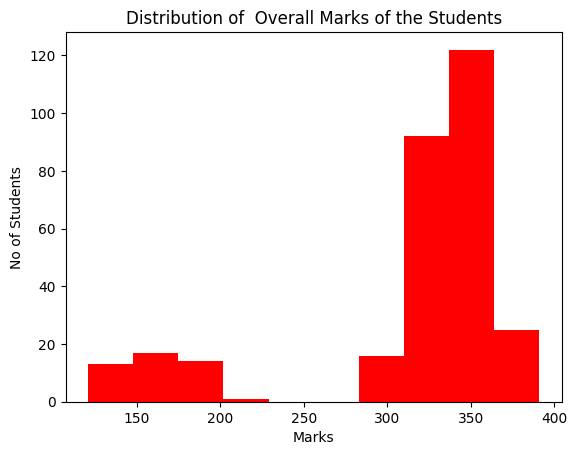

In [48]:
plt.hist(df["Overall Total"],bins=10,color="red")
plt.title("Distribution of  Overall Marks of the Students")
plt.xlabel("Marks")
plt.ylabel("No of Students")
plt.show()

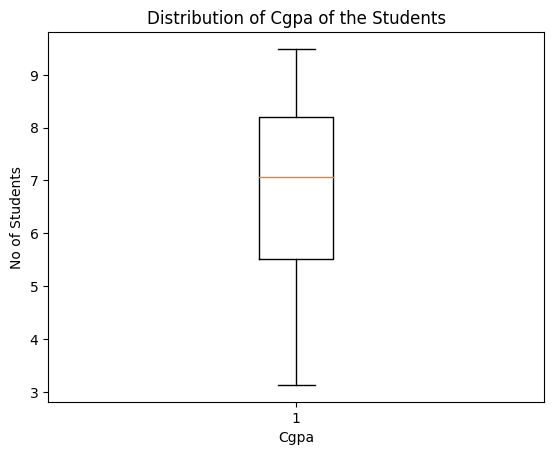

In [49]:
plt.boxplot(df["CGPA"])
plt.title("Distribution of Cgpa of the Students")
plt.xlabel("Cgpa")
plt.ylabel("No of Students")
plt.show()

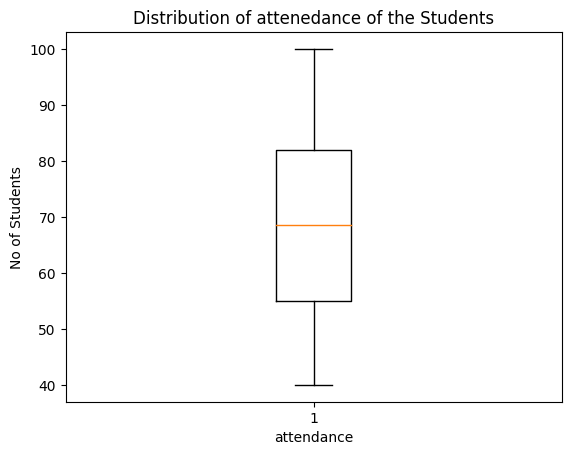

In [50]:
plt.boxplot(df["Attendance (%)"])
plt.title("Distribution of attenedance of the Students")
plt.xlabel("attendance")
plt.ylabel("No of Students")
plt.show()

In [51]:
df.columns

Index(['Study Time (hrs/week)', 'Attendance (%)', 'Parental Support',
       'Internet Access', 'Extra Curricular', 'Failures',
       'Core Python Internal', 'Core Python External', 'Core Python Total',
       'Advanced Java Internal', 'Advanced Java External',
       'Advanced Java Total', 'Software Engineering Internal',
       'Software Engineering External', 'Software Engineering Total',
       'Data Warehousing and Data Mining Internal',
       'Data Warehousing and Data Mining External',
       'Data Warehousing and Data Mining Total', 'Overall Total', 'CGPA',
       'Target', 'Previous_Year_CGPA', 'Study Time'],
      dtype='object')

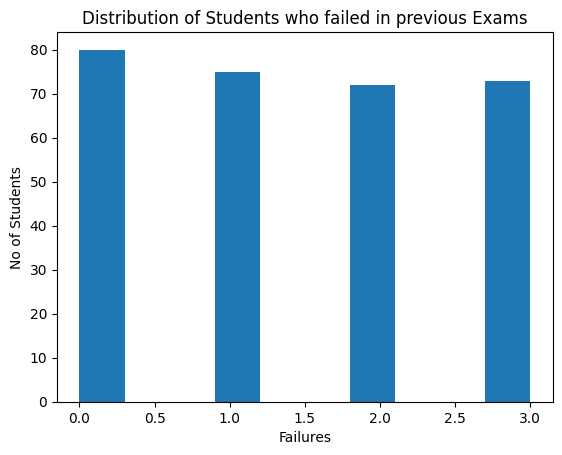

In [52]:
plt.hist(df["Failures"])
plt.title("Distribution of Students who failed in previous Exams")
plt.xlabel("Failures")
plt.ylabel("No of Students")
plt.show()

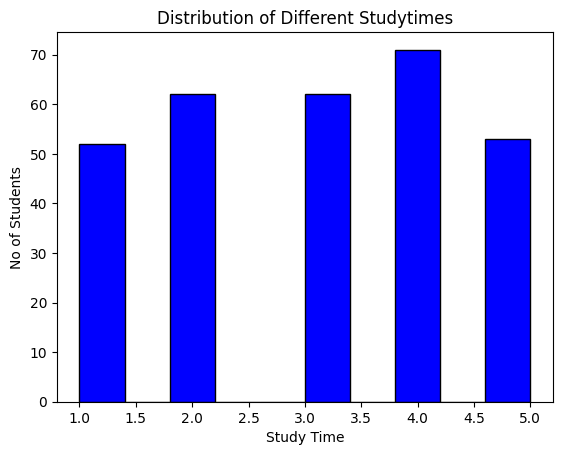

In [53]:
plt.hist(df["Study Time"],edgecolor="black",color="blue")
plt.title("Distribution of Different Studytimes")
plt.xlabel("Study Time")
plt.ylabel("No of Students")
plt.show()

In [54]:
df["Study Time"].value_counts().sort_index()

Study Time
1    52
2    62
3    62
4    71
5    53
Name: count, dtype: int64

In [55]:
pct_vs_tot=pd.crosstab(df["Study Time"],df["CGPA"].round())

<Axes: title={'center': 'Does students with high study time have greater cgpa?'}, xlabel='CGPA', ylabel='Study Time'>

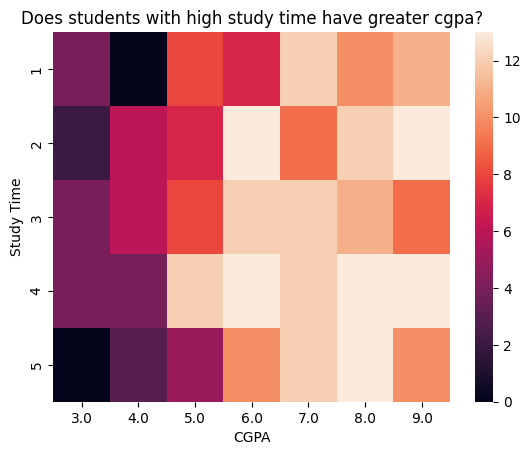

In [56]:
plt.title("Does students with high study time have greater cgpa?")
sns.heatmap(pct_vs_tot)

In [57]:
grouped = df.groupby("Study Time")["CGPA"].mean()
grouped

Study Time
1    6.868077
2    6.790484
3    6.550484
4    6.705070
5    7.151887
Name: CGPA, dtype: float64

<Axes: xlabel='Study Time', ylabel='CGPA'>

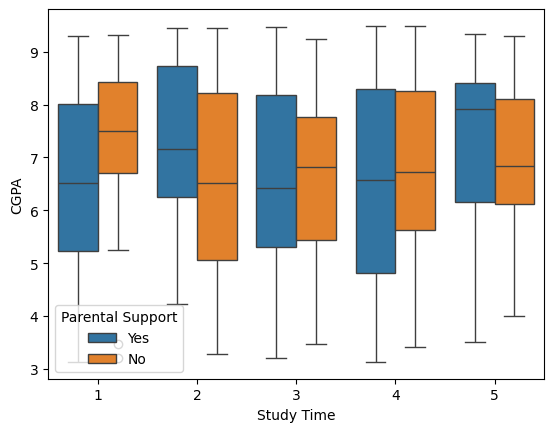

In [58]:
sns.boxplot(x="Study Time",y="CGPA",hue="Parental Support",data=df)

<Axes: xlabel='Study Time', ylabel='CGPA'>

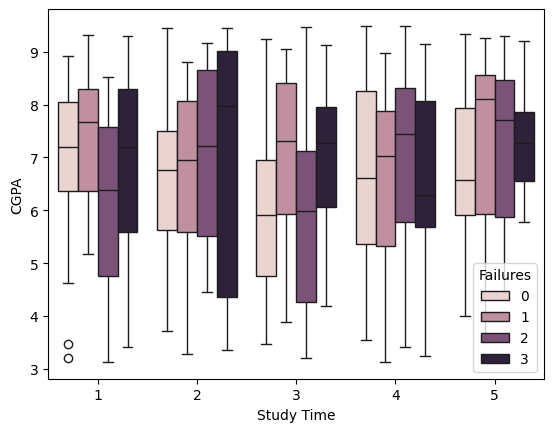

In [59]:
sns.boxplot(x="Study Time",y="CGPA",hue="Failures",data=df)

In [60]:
df.columns

Index(['Study Time (hrs/week)', 'Attendance (%)', 'Parental Support',
       'Internet Access', 'Extra Curricular', 'Failures',
       'Core Python Internal', 'Core Python External', 'Core Python Total',
       'Advanced Java Internal', 'Advanced Java External',
       'Advanced Java Total', 'Software Engineering Internal',
       'Software Engineering External', 'Software Engineering Total',
       'Data Warehousing and Data Mining Internal',
       'Data Warehousing and Data Mining External',
       'Data Warehousing and Data Mining Total', 'Overall Total', 'CGPA',
       'Target', 'Previous_Year_CGPA', 'Study Time'],
      dtype='object')

In [61]:
df["Target"].value_counts()

Target
Pass    255
Fail     45
Name: count, dtype: int64

In [62]:
df.columns

Index(['Study Time (hrs/week)', 'Attendance (%)', 'Parental Support',
       'Internet Access', 'Extra Curricular', 'Failures',
       'Core Python Internal', 'Core Python External', 'Core Python Total',
       'Advanced Java Internal', 'Advanced Java External',
       'Advanced Java Total', 'Software Engineering Internal',
       'Software Engineering External', 'Software Engineering Total',
       'Data Warehousing and Data Mining Internal',
       'Data Warehousing and Data Mining External',
       'Data Warehousing and Data Mining Total', 'Overall Total', 'CGPA',
       'Target', 'Previous_Year_CGPA', 'Study Time'],
      dtype='object')

In [63]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df["Target"] = le.fit_transform(df["Target"])

In [64]:
x_train,x_test,y_train,y_test = train_test_split(df.drop(columns=["Target"]),df["Target"],test_size=0.2,random_state=0)

In [65]:
x_train.shape

(240, 22)